In [1]:
import numpy as np
import matcomp_algorithms as mca
import matplotlib.pyplot as plt
from matplotlib import cm
from copy import copy

In [2]:
#np.set_printoptions(precision=3)
np.set_printoptions(suppress=True)

In [3]:
np.random.seed(89)
N = 6

In [4]:
A = np.random.rand(N,N)

In [5]:
A = A.T + A

In [6]:
np.allclose(A, A.T)

True

In [7]:
Tridiag = A.copy()

In [8]:
mca.House_tridiag(Tridiag)

In [9]:
Q = mca.Q_from_House_tridiag(Tridiag)

In [10]:
QQT = np.dot(Q, Q.T)

In [11]:
QTQ = np.dot(Q.T, Q)

In [12]:
np.allclose(np.identity(N), QQT)

True

In [13]:
print(QQT)

[[ 1.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0. -0.  0.]
 [ 0.  0.  1. -0.  0. -0.]
 [ 0.  0. -0.  1.  0. -0.]
 [ 0. -0.  0.  0.  1.  0.]
 [ 0.  0. -0. -0.  0.  1.]]


In [14]:
np.allclose(np.identity(N), QTQ)

True

In [15]:
print(QTQ)

[[ 1.  0.  0.  0.  0.  0.]
 [ 0.  1. -0. -0.  0. -0.]
 [ 0. -0.  1.  0.  0.  0.]
 [ 0. -0.  0.  1.  0. -0.]
 [ 0.  0.  0.  0.  1. -0.]
 [ 0. -0.  0. -0. -0.  1.]]


In [16]:
np.allclose(np.diag(v=Tridiag,k=1), np.diag(v=Tridiag,k=-1))

True

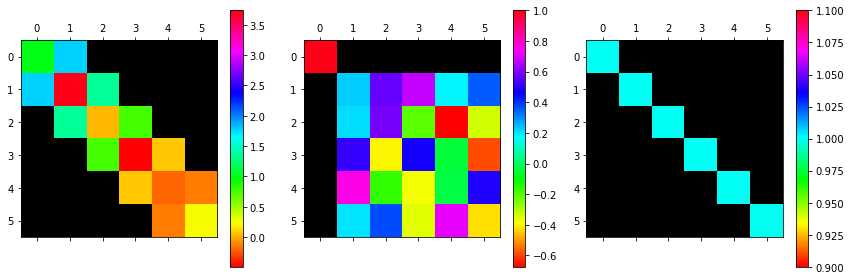

In [17]:
cmap = copy(cm.get_cmap("hsv"))
cmap.set_bad(color='black')

plt.figure(figsize=(12,4))

plt.subplot(131)
Tridiag_masked = np.ma.masked_where(np.abs(np.triu(Tridiag, k=-1)) < 1e-15, np.triu(Tridiag, k=-1))
plt.matshow(Tridiag_masked, fignum=0, cmap=cmap)
plt.colorbar()

plt.subplot(132)
Q_masked = np.ma.masked_where(np.abs(Q) < 1e-15, Q)
plt.matshow(Q_masked, fignum=0, cmap=cmap)
plt.colorbar()

plt.subplot(133)
QTQ_masked = np.ma.masked_where(np.abs(QTQ) < 1e-15, QTQ)
plt.matshow(QTQ_masked, fignum=0, cmap=cmap)
plt.colorbar()

plt.tight_layout()
plt.show()

In [18]:
AQ = np.dot(A,Q)
QTAQ = np.dot(Q.T, AQ)

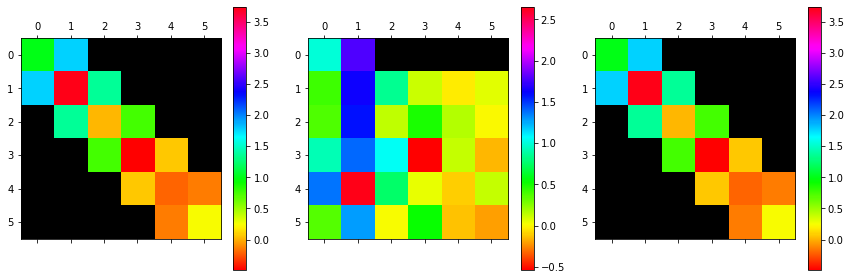

In [19]:
cmap = copy(cm.get_cmap("hsv"))
cmap.set_bad(color='black')

plt.figure(figsize=(12,4))

plt.subplot(131)
Tridiag_masked = np.ma.masked_where(np.abs(np.triu(Tridiag, k=-1)) < 1e-15, np.triu(Tridiag, k=-1))
plt.matshow(Tridiag_masked, fignum=0, cmap=cmap)
plt.colorbar()

plt.subplot(132)
AQ_masked = np.ma.masked_where(np.abs(AQ) < 1e-15, AQ)
plt.matshow(AQ_masked, fignum=0, cmap=cmap)
plt.colorbar()

plt.subplot(133)
QTAQ_masked = np.ma.masked_where(np.abs(QTAQ) < 1e-15, QTAQ)
plt.matshow(QTAQ_masked, fignum=0, cmap=cmap)
plt.colorbar()

plt.tight_layout()
plt.show()

In [20]:
np.allclose(QTAQ, np.triu(Tridiag, k=-1))

True

In [21]:
np.random.seed(8)
N = 6

In [22]:
A = np.random.rand(N,N)

In [23]:
A = A.T + A

In [24]:
Tridiag2 = np.tril(m=np.triu(m=A, k=-1), k=1)

In [25]:
Tridiag2

array([[1.74685881, 1.39900948, 0.        , 0.        , 0.        ,
        0.        ],
       [1.39900948, 0.80470272, 1.23504925, 0.        , 0.        ,
        0.        ],
       [0.        , 1.23504925, 1.23936419, 0.49190016, 0.        ,
        0.        ],
       [0.        , 0.        , 0.49190016, 1.96574109, 1.02400072,
        0.        ],
       [0.        , 0.        , 0.        , 1.02400072, 0.69092322,
        1.92355335],
       [0.        , 0.        , 0.        , 0.        , 1.92355335,
        0.63937959]])

In [26]:
Z, mu = mca.imp_symm_QR_step_shift(Tridiag2)

In [27]:
np.allclose(Tridiag2, np.linalg.multi_dot([Z.T, Tridiag2, Z]))

False

In [28]:
U = np.dot(Z.T, Tridiag2 - mu*np.identity(Tridiag2.shape[0]))

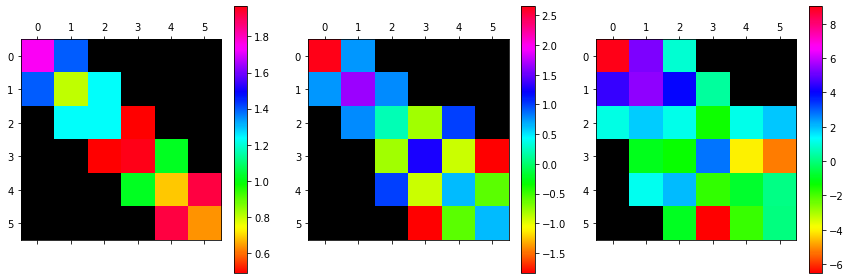

In [29]:
cmap = copy(cm.get_cmap("hsv"))
cmap.set_bad(color='black')

plt.figure(figsize=(12,4))

plt.subplot(131)
Tridiag2_masked = np.ma.masked_where(np.abs(Tridiag2) < 1e-15, Tridiag2)
plt.matshow(Tridiag2_masked, fignum=0, cmap=cmap)
plt.colorbar()

plt.subplot(132)
Z_masked = np.ma.masked_where(np.abs(Z) < 1e-15, Z)
plt.matshow(Z_masked, fignum=0, cmap=cmap)
plt.colorbar()

plt.subplot(133)
U_masked = np.ma.masked_where(np.abs(U) < 1e-15, U)
plt.matshow(U_masked, fignum=0, cmap=cmap)
plt.colorbar()

plt.tight_layout()
plt.show()